In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
from mlxtend.frequent_patterns import apriori, association_rules

In [62]:
# Loading the dataset 

data =pd.read_excel("C:\\Users\\M.A.C.S.Rathnayake\\Downloads\\cleaned_dataset.xlsx")

In [63]:
# Creating a DataFrame from the dataset

df = pd.DataFrame(data)

In [64]:
# Identifying repeated order IDs

repeated_order_ids = df[df.duplicated(subset=['Order ID'], keep=False)]['Order ID'].unique()

In [65]:
# Filtering the DataFrame to keep only rows with repeated order IDs

df_repeated_orders = df[df['Order ID'].isin(repeated_order_ids)]

In [66]:
# Converting Order ID and Sub-Category into a list of lists format

basket = (df_repeated_orders.groupby(['Order ID', 'Sub-Category'])['Row ID']
            .count().unstack().reset_index().fillna(0)
            .set_index('Order ID'))

In [67]:
# Converting counts to binary values (0 or 1)

transaction_df = basket.map(lambda x: x > 0)


In [68]:
# Generating frequent itemsets

frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

In [69]:
# Generating association rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [70]:
# Printing frequent itemsets

print("\nFrequent Itemsets:\n")
print(frequent_itemsets)


Frequent Itemsets:

     support                     itemsets
0   0.146341                (Accessories)
1   0.195122                 (Appliances)
2   0.243902                  (Bookcases)
3   0.243902                     (Chairs)
4   0.292683                    (Copiers)
5   0.219512                   (Machines)
6   0.365854                     (Phones)
7   0.073171                    (Storage)
8   0.024390                   (Supplies)
9   0.097561                     (Tables)
10  0.024390    (Appliances, Accessories)
11  0.048780        (Accessories, Chairs)
12  0.048780      (Accessories, Machines)
13  0.024390        (Accessories, Tables)
14  0.024390      (Appliances, Bookcases)
15  0.024390         (Appliances, Chairs)
16  0.024390        (Appliances, Copiers)
17  0.097561         (Appliances, Phones)
18  0.024390          (Chairs, Bookcases)
19  0.097561         (Copiers, Bookcases)
20  0.024390          (Phones, Bookcases)
21  0.024390        (Bookcases, Supplies)
22  0.024390 

In [71]:
# Printing association rules

print("\nAssociation Rules:\n")
print(rules)



Association Rules:

            antecedents          consequents  antecedent support  \
0         (Accessories)             (Chairs)            0.146341   
1              (Chairs)        (Accessories)            0.243902   
2         (Accessories)           (Machines)            0.146341   
3            (Machines)        (Accessories)            0.219512   
4         (Accessories)             (Tables)            0.146341   
5              (Tables)        (Accessories)            0.097561   
6          (Appliances)             (Phones)            0.195122   
7              (Phones)         (Appliances)            0.365854   
8             (Copiers)          (Bookcases)            0.292683   
9           (Bookcases)            (Copiers)            0.243902   
10          (Bookcases)           (Supplies)            0.243902   
11           (Supplies)          (Bookcases)            0.024390   
12             (Tables)          (Bookcases)            0.097561   
13          (Bookcases)    

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


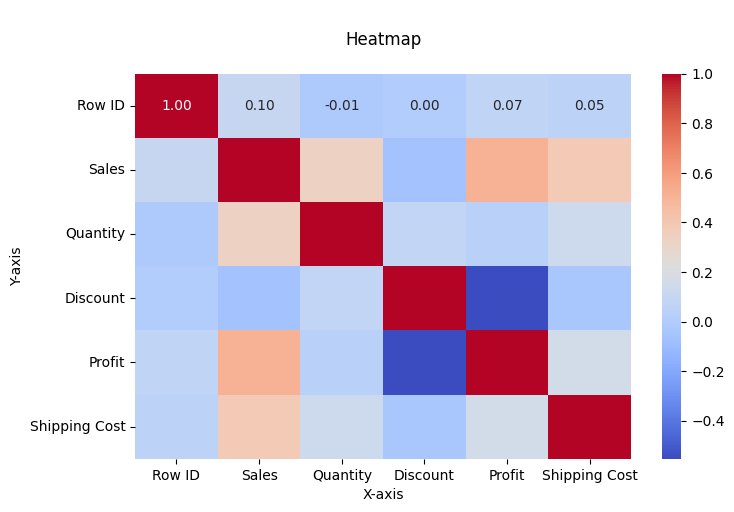

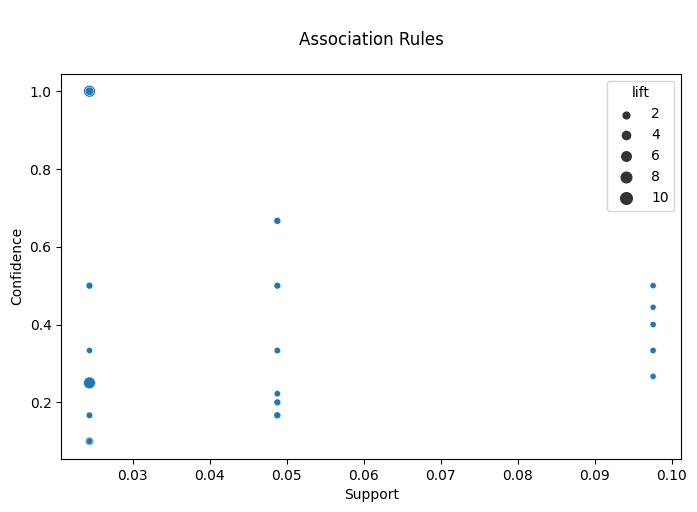

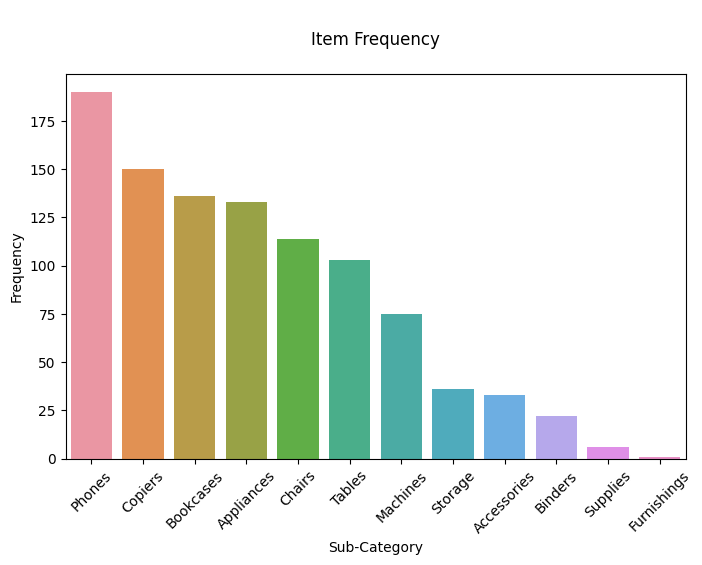

In [72]:
s# Filter association rules

filtered_rules = rules[(rules['support'] > 0.05) & (rules['confidence'] > 0.5)]
print(filtered_rules)

# Filter numeric columns

numeric_df = df.select_dtypes(include='number')

# Suppress the warning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)
    
    # Create the heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
    plt.title('\nHeatmap\n')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()


    # Create scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
    plt.title("\nAssociation Rules\n")
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.show()
    

   # Create bar chart
    item_frequency = df['Sub-Category'].value_counts()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=item_frequency.index, y=item_frequency.values)
    plt.title("\nItem Frequency\n")
    plt.xlabel("Sub-Category")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()




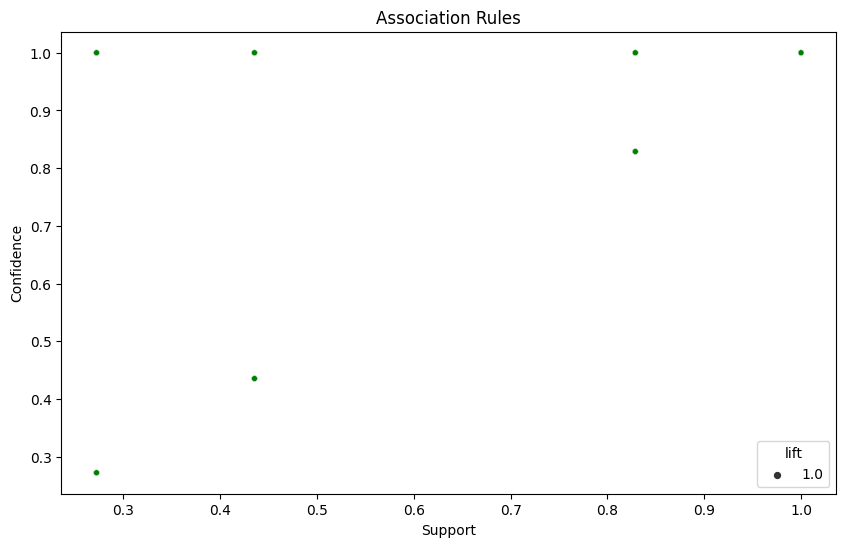

In [73]:
# Ignore FutureWarnings and DeprecationWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Convert non-numeric columns to numeric if possible
df_numeric = df.apply(pd.to_numeric, errors='ignore')

# Drop non-numeric columns
df_numeric = df_numeric.select_dtypes(include='number')

# Convert DataFrame to boolean format
df_boolean = df_numeric.applymap(lambda x: True if x > 0 else False)

# Perform market basket analysis using Apriori
frequent_itemsets = apriori(df_boolean, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Visualize the association rules (scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, color='green')
plt.title("Association Rules")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()


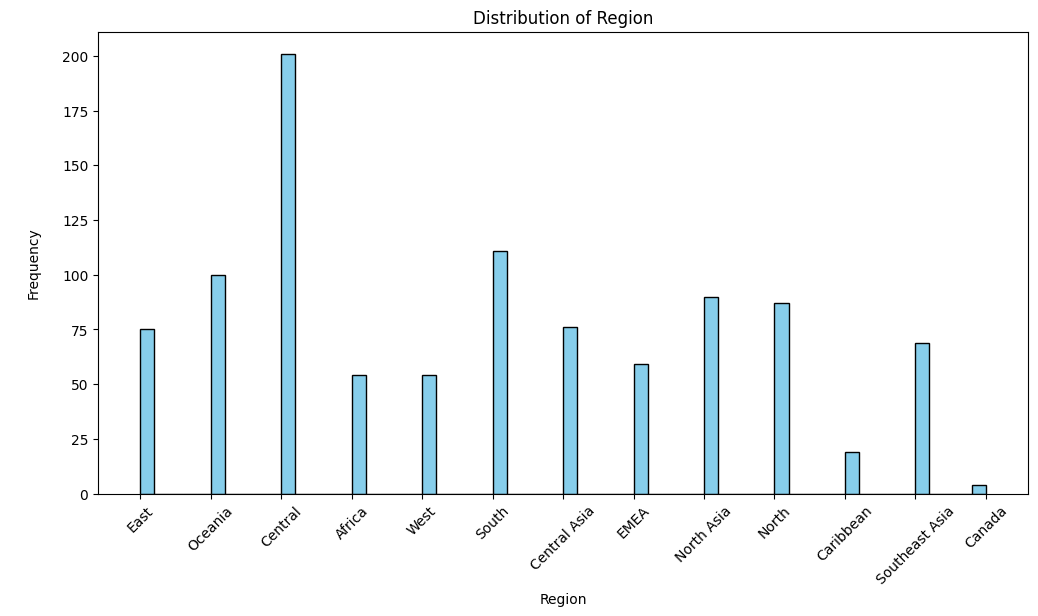

In [74]:
plt.figure(figsize=(12, 6))  
plt.hist(df['Region'], bins=60, color='skyblue', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('\nFrequency\n')
plt.title('Distribution of Region')
plt.xticks(rotation=45) 
plt.show()


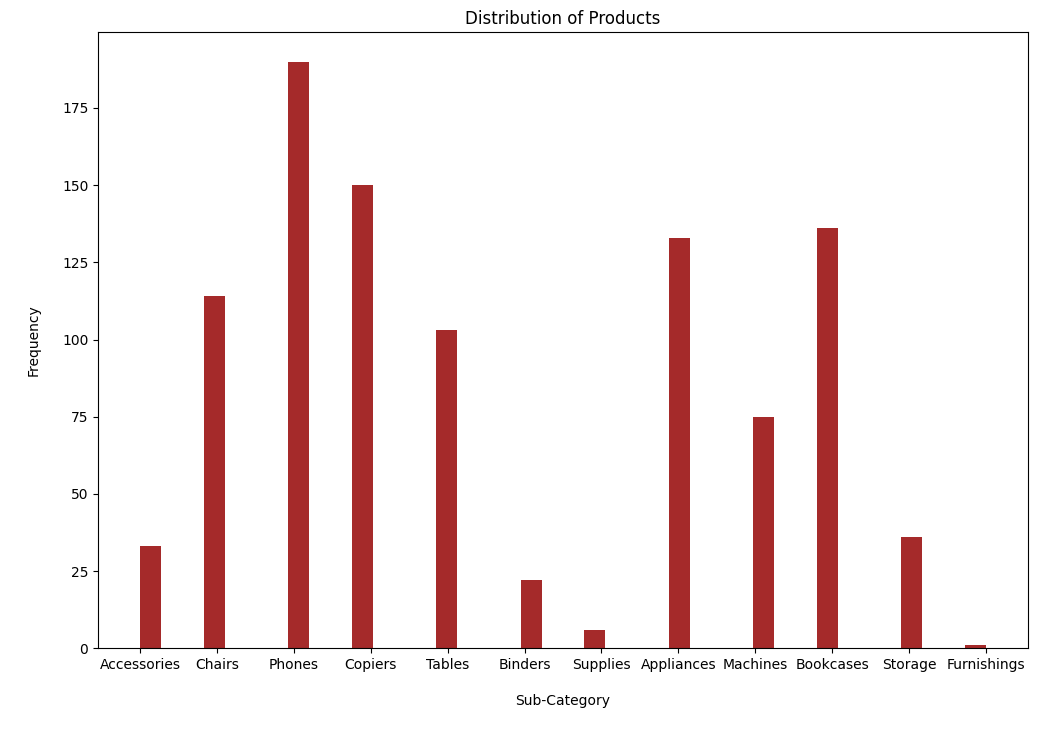

In [75]:
# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.hist(df['Sub-Category'],bins=40, color='brown')
plt.title('Distribution of Products')
plt.xlabel('\nSub-Category\n ')
plt.ylabel('\nFrequency\n')
plt.show()


In [76]:
import numpy as np

# Define a function to calculate bootstrap confidence interval
def bootstrap_confidence_interval(data, alpha=0.05, n_bootstrap=1000):
    metrics_bootstrapped = np.zeros(n_bootstrap)
    n_samples = len(data)
    for i in range(n_bootstrap):
        samples = np.random.choice(data, size=n_samples, replace=True)
        metrics_bootstrapped[i] = np.mean(samples)  # Calculate mean as an example
    lower_bound = np.percentile(metrics_bootstrapped, 100 * alpha / 2)
    upper_bound = np.percentile(metrics_bootstrapped, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

# Example: Estimate confidence interval for the mean
data = np.random.normal(loc=10, scale=2, size=1000)  # Generate example data
ci_lower, ci_upper = bootstrap_confidence_interval(data)
print("Confidence Interval (95%):", (ci_lower, ci_upper))


Confidence Interval (95%): (9.853935162184225, 10.104102875306268)
